In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data.csv')


In [4]:
df

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,M,41.0,1,67325.31,0.0,0.0,0,0
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,M,34.0,1,0.00,0.0,0.0,0,0
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,M,33.0,1,30978.18,1.0,539451.0,0,0
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,0,22,F,56.0,1,366241.86,0.0,0.0,0,0
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,0,24,M,53.0,1,394095.24,0.0,479898.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,1,5,M,28.0,1,65162.61,0.0,0.0,0,0
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,0,5,M,25.0,1,0.00,0.0,0.0,0,0
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,0,24,M,44.0,1,347329.62,0.0,0.0,0,0
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,0,20,M,53.0,1,0.00,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148475 entries, 0 to 148474
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       148475 non-null  int64  
 1   policy_rk                        148475 non-null  int64  
 2   total_premium_amt                148475 non-null  float64
 3   coverage                         148475 non-null  object 
 4   repair_option                    148475 non-null  object 
 5   paid_flg                         148475 non-null  int64  
 6   region                           148475 non-null  object 
 7   auto_make                        148475 non-null  object 
 8   auto_model                       148475 non-null  object 
 9   auto_cost                        148471 non-null  float64
 10  vehicle_mileage_km_amt           148433 non-null  float64
 11  vehicle_new_flg                  147971 non-null  float64
 12  au

In [6]:
df.describe()

,Unnamed: 0,policy_rk,total_premium_amt,paid_flg,auto_cost,vehicle_mileage_km_amt,vehicle_new_flg,audatex_claim_cnt,audatex_total_cost_amt,vehicle_issue_year,vehicle_credit_flg,min_driver_experience_years_cnt,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
count,148475.000000,1.484750e+05,1.484750e+05,148475.000000,1.484710e+05,148433.000000,147971.000000,139833.000000,1.484750e+05,148475.000000,148475.000000,148475.000000,147648.000000,148475.0,1.484750e+05,148099.000000,1.484750e+05,148475.000000,148475.000000
mean,74237.000000,3.503834e+08,5.319333e+05,0.198660,2.363104e+06,23895.672741,0.103534,0.442792,3.946513e+05,2019.017761,0.364492,15.500535,43.872250,1.0,1.720414e+05,0.300481,3.300216e+05,0.106483,0.071507
std,42861.184946,4.331083e+07,4.477189e+05,0.398993,1.613284e+06,31558.893806,0.304656,0.893975,1.230417e+06,2.268377,0.481289,8.718451,10.817407,0.0,2.709734e+05,0.458469,2.704266e+06,0.308455,0.257671
min,0.000000,2.833631e+08,6.120000e+03,0.000000,1.080000e+05,0.000000,0.000000,0.000000,0.000000e+00,2007.000000,0.000000,0.000000,20.000000,1.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,37118.500000,2.931866e+08,2.606400e+05,0.000000,1.331278e+06,3500.000000,0.000000,0.000000,0.000000e+00,2018.000000,0.000000,10.000000,36.000000,1.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,74237.000000,3.767784e+08,4.370400e+05,0.000000,2.000000e+06,13000.000000,0.000000,0.000000,0.000000e+00,2020.000000,0.000000,15.000000,42.000000,1.0,2.397690e+04,0.000000,0.000000e+00,0.000000,0.000000
75%,111355.500000,3.834077e+08,6.705000e+05,0.000000,2.850000e+06,30251.000000,0.000000,1.000000,3.771900e+04,2021.000000,1.000000,20.000000,50.000000,1.0,2.917758e+05,1.000000,4.687200e+05,0.000000,0.000000
max,148474.000000,3.960119e+08,2.402010e+07,1.000000,1.830000e+07,350000.000000,1.000000,9.000000,2.074634e+07,2022.000000,1.000000,61.000000,90.000000,1.0,1.425971e+07,1.000000,2.986203e+08,1.000000,1.000000


In [7]:
# Очистка и подготовка данных

In [8]:
# Очистка от строк с значением ' ' и NaN
if df is not None:
    df.replace(' ', np.nan, inplace=True)
    data = df.dropna()
    print(data.isnull().sum())


Unnamed: 0                         0
policy_rk                          0
total_premium_amt                  0
coverage                           0
repair_option                      0
paid_flg                           0
region                             0
auto_make                          0
auto_model                         0
auto_cost                          0
vehicle_mileage_km_amt             0
vehicle_new_flg                    0
audatex_claim_cnt                  0
audatex_total_cost_amt             0
vehicle_issue_year                 0
vehicle_credit_flg                 0
min_driver_experience_years_cnt    0
insurant_gender_cd                 0
age                                0
issue_flg                          0
expected_loss_amt                  0
transition_flg                     0
premium_transition_amt             0
renewed_issue_flg                  0
renewed_paid_flg                   0
dtype: int64


In [9]:
# Обработка дубликатов
duplicate_rows_data = df[df.duplicated()]
print("Количество повторяющихся строк: ", duplicate_rows_data.shape)


Количество повторяющихся строк:  (0, 25)


In [10]:
# Проверка уникальности данных в столбцах
print(f"Колонка | Кол-во уникальных значений")
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")


Колонка | Кол-во уникальных значений
Unnamed: 0: 148475 distinct values
policy_rk: 25467 distinct values
total_premium_amt: 9309 distinct values
coverage: 4 distinct values
repair_option: 4 distinct values
paid_flg: 2 distinct values
region: 75 distinct values
auto_make: 66 distinct values
auto_model: 506 distinct values
auto_cost: 5095 distinct values
vehicle_mileage_km_amt: 2033 distinct values
vehicle_new_flg: 3 distinct values
audatex_claim_cnt: 11 distinct values
audatex_total_cost_amt: 3449 distinct values
vehicle_issue_year: 16 distinct values
vehicle_credit_flg: 2 distinct values
min_driver_experience_years_cnt: 61 distinct values
insurant_gender_cd: 3 distinct values
age: 71 distinct values
issue_flg: 1 distinct values
expected_loss_amt: 18917 distinct values
transition_flg: 3 distinct values
premium_transition_amt: 5141 distinct values
renewed_issue_flg: 2 distinct values
renewed_paid_flg: 2 distinct values


 1   policy_rk -- Уникальный номер выпущенного полиса

 2   total_premium_amt -- Сумма премии выпущенного полиса

 3   coverage -- Покрытие полиса

 4   repair_option -- Выбранный ремонт по полису

 5   paid_flg -- Флаг оплаты полиса: 1 – оплачен; 0 – не оплачен.

 6   region -- Регион использования авто

 7   auto_make -- Марка авто

 8   auto_model -- Модель авто

 9   auto_cost -- Цена авто

 10  vehicle_mileage_km_amt -- Пробег авто

 11  vehicle_new_flg -- Флаг нового авто: 1 – новое авто; 0 – Б\у.

 12  audatex_claim_cnt -- Количество убытков за предыдущие периоды

 13  audatex_total_cost_amt -- Сумма убытков за предыдущие периоды

 14  vehicle_issue_year -- Год выпуска авто

 15  vehicle_credit_flg -- Флаг кредитного авто: 1 – кредитное авто 0 – не кредитное.
  
 16  min_driver_experience_years_cnt -- Стаж вождения

 17  insurant_gender_cd -- Пол водителя: F – женский; M - мужкой.


 18  age -- Возраст водителя

 19  issue_flg -- Флаг выпуски полиса: 1 – выпущен; 0 – не выпущен.

 20  expected_loss_amt -- Сумма предполагаемого убытка по полису

 21  transition_flg -- Флаг наличия предыдущего полиса другой
страховой: 1 – есть полис; 0 – нет полиса.

 22  premium_transition_amt -- Стоимость предыдущего полиса страховой

 23  renewed_issue_flg -- Флаг выпуска пролонгации: 1 – пролонгация выпущена; 0 – пролонгация не выпущена.

 24  renewed_paid_flg -- Флаг оплаты пролонгации: 1 – оплачено; 0 – не оплачено.

In [11]:
# Преобразование категориальных переменных в числовые
coverage_mapping = {
    'Тоталь + Угон': 1,
    'Полное КАСКО': 2,
    'Только ущерб': 3,
    'Только Угон': 4
}

repair_option_mapping = {
    'Ремонт на СТОА официального дилера': 1,
    'Ремонт на СТОА по направлению страховщика': 2,
    'Отсутствует/неизвестно': 3,
    'Эконом ремонт на СТОА по направлению Страховщика': 4
}

gender_mapping = {
    'M': 1,
    'F': 0
}

df['coverage'] = df['coverage'].replace(coverage_mapping)
df['repair_option'] = df['repair_option'].replace(repair_option_mapping)
df['insurant_gender_cd'] = df['insurant_gender_cd'].replace(gender_mapping)

df

<ipython-input-11-37864e2e2a69>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['coverage'] = df['coverage'].replace(coverage_mapping)
<ipython-input-11-37864e2e2a69>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['repair_option'] = df['repair_option'].replace(repair_option_mapping)
<ipython-input-11-37864e2e2a69>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futu

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
0,0,376775127,495900.00,1,1,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,1.0,41.0,1,67325.31,0.0,0.0,0,0
1,1,284447889,418820.22,2,1,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,1.0,34.0,1,0.00,0.0,0.0,0,0
2,2,384100566,209520.00,1,1,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,1.0,33.0,1,30978.18,1.0,539451.0,0,0
3,3,376032837,501300.00,2,2,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,0,22,0.0,56.0,1,366241.86,0.0,0.0,0,0
4,4,286011732,478800.00,2,1,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,0,24,1.0,53.0,1,394095.24,0.0,479898.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,1,2,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,1,5,1.0,28.0,1,65162.61,0.0,0.0,0,0
148471,148471,293965557,243603.18,1,2,1,Московская область,BMW,BMW 3er,1741500.0,...,0,5,1.0,25.0,1,0.00,0.0,0.0,0,0
148472,148472,388760604,457200.00,2,1,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,0,24,1.0,44.0,1,347329.62,0.0,0.0,0,0
148473,148473,383402733,982800.00,2,1,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,0,20,1.0,53.0,1,0.00,0.0,0.0,0,0


In [12]:
main_features = ['total_premium_amt', 'repair_option', 'coverage',
                 'auto_cost', 'vehicle_mileage_km_amt',
                 'audatex_claim_cnt', 'audatex_total_cost_amt',
                 'vehicle_issue_year', 'min_driver_experience_years_cnt',
                 'age', 'expected_loss_amt', 'premium_transition_amt',
                 'renewed_issue_flg', 'insurant_gender_cd',
                 'paid_flg', 'vehicle_new_flg', 'vehicle_credit_flg',
                 'issue_flg', 'transition_flg']

categorical_features = ['region', 'auto_make', 'auto_model',
                        'renewed_paid_flg']

Rejection 531 points


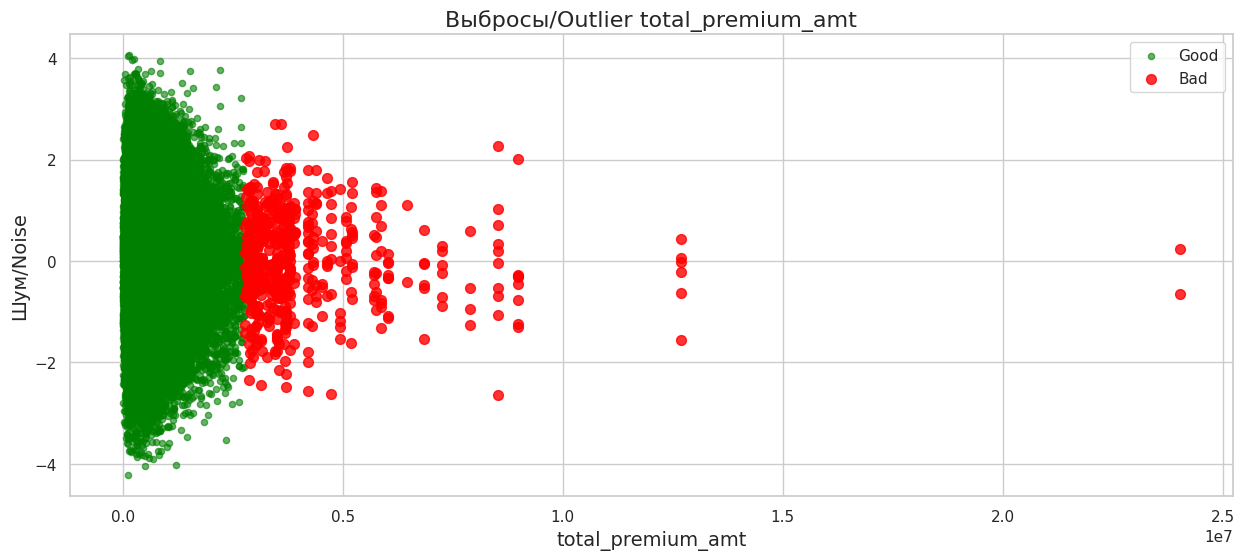

Rejection 314 points


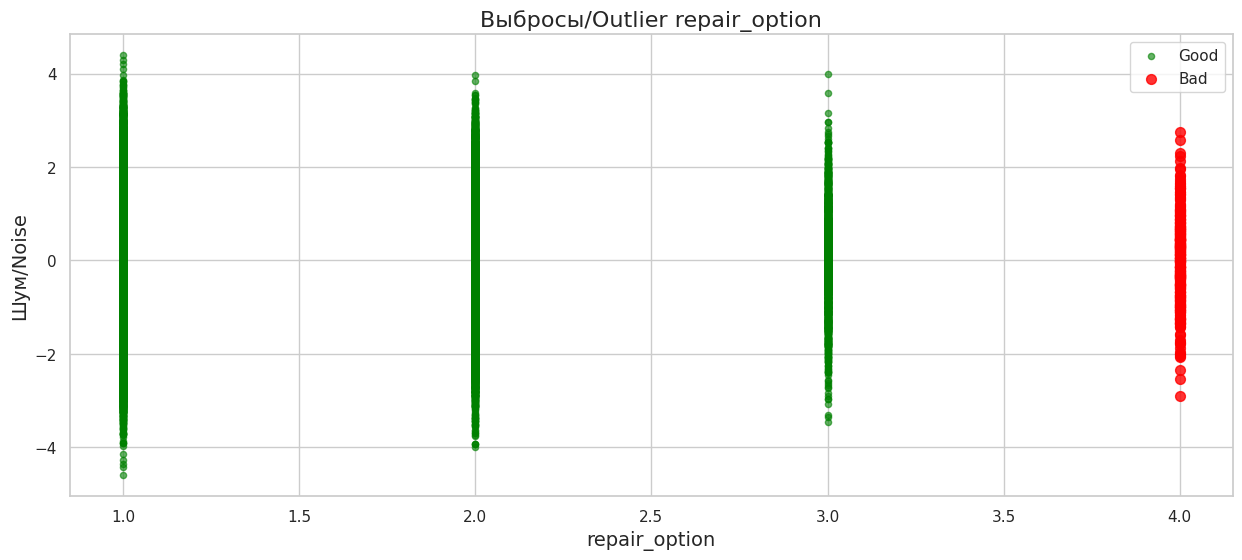

Rejection 0 points


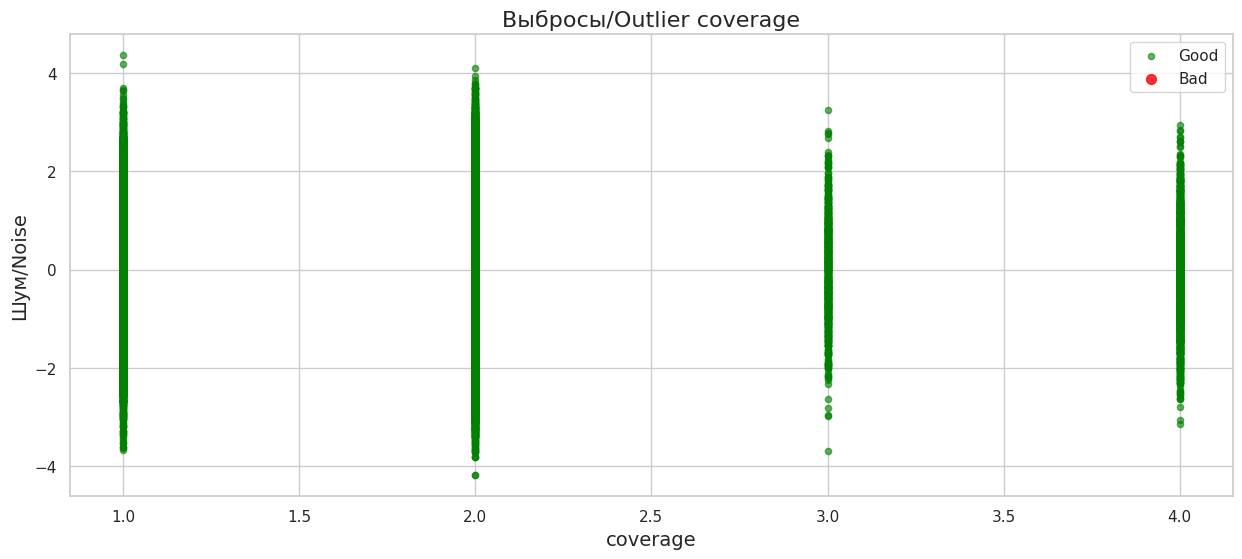

Rejection 551 points


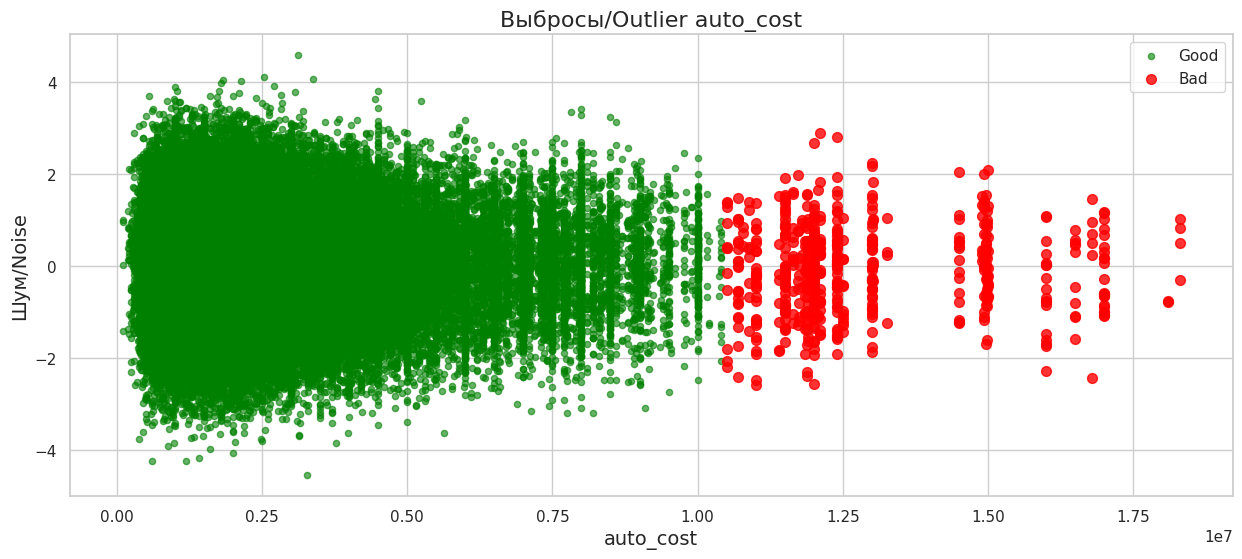

Rejection 513 points


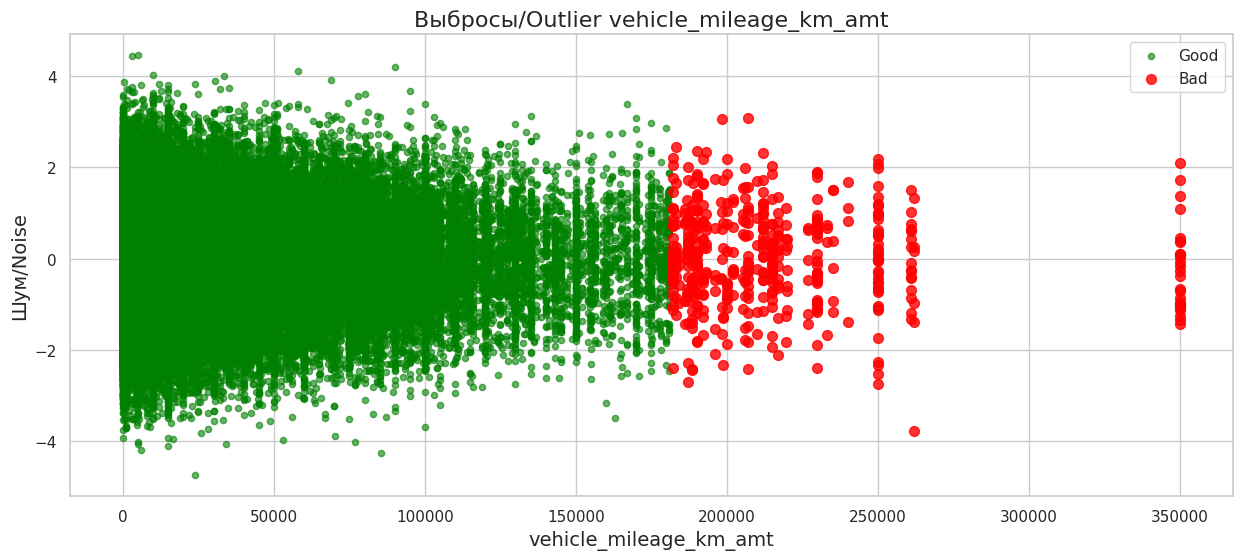

Rejection 9345 points


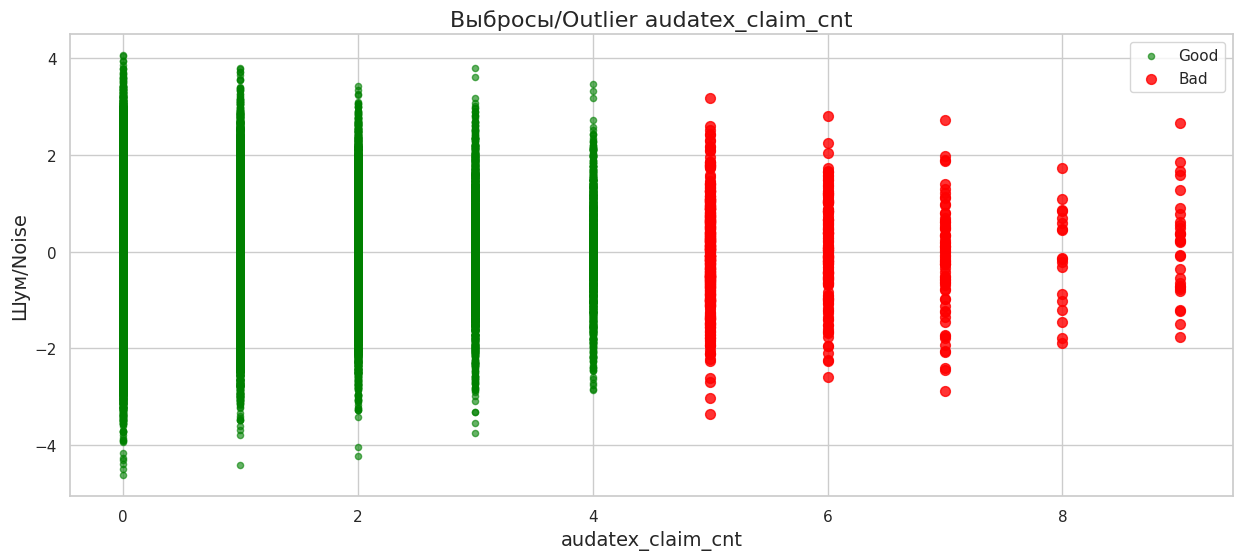

Rejection 1081 points


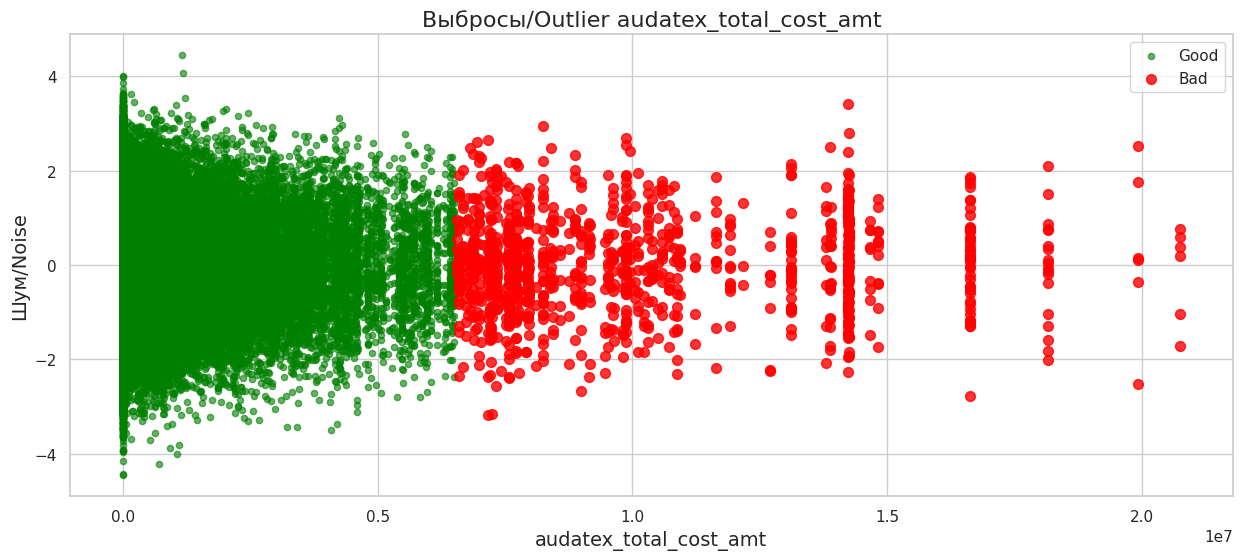

Rejection 10 points


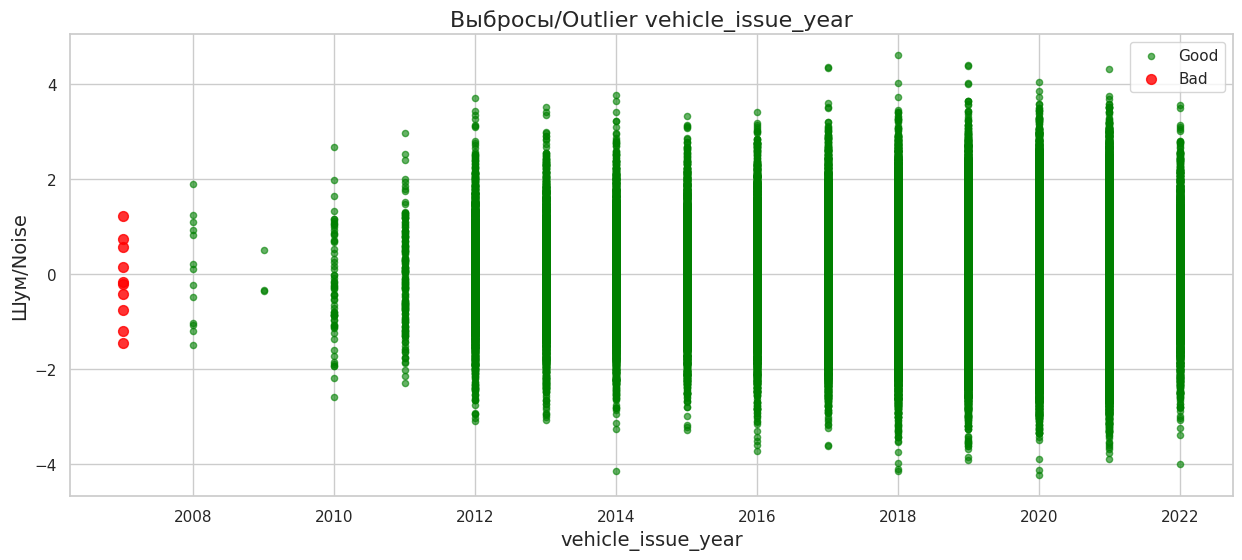

Rejection 8 points


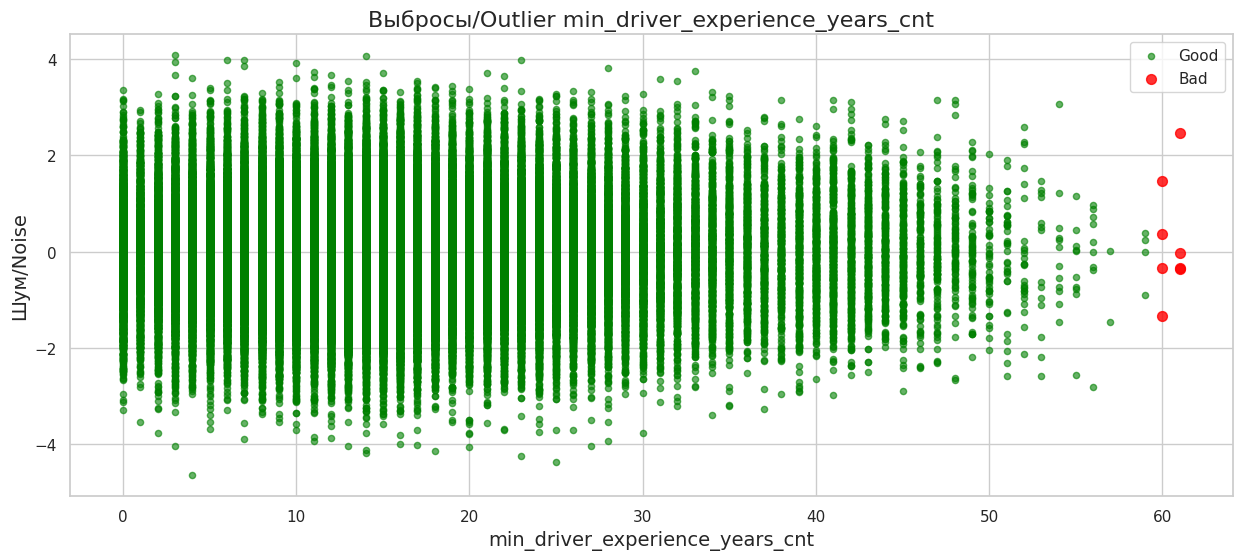

Rejection 827 points


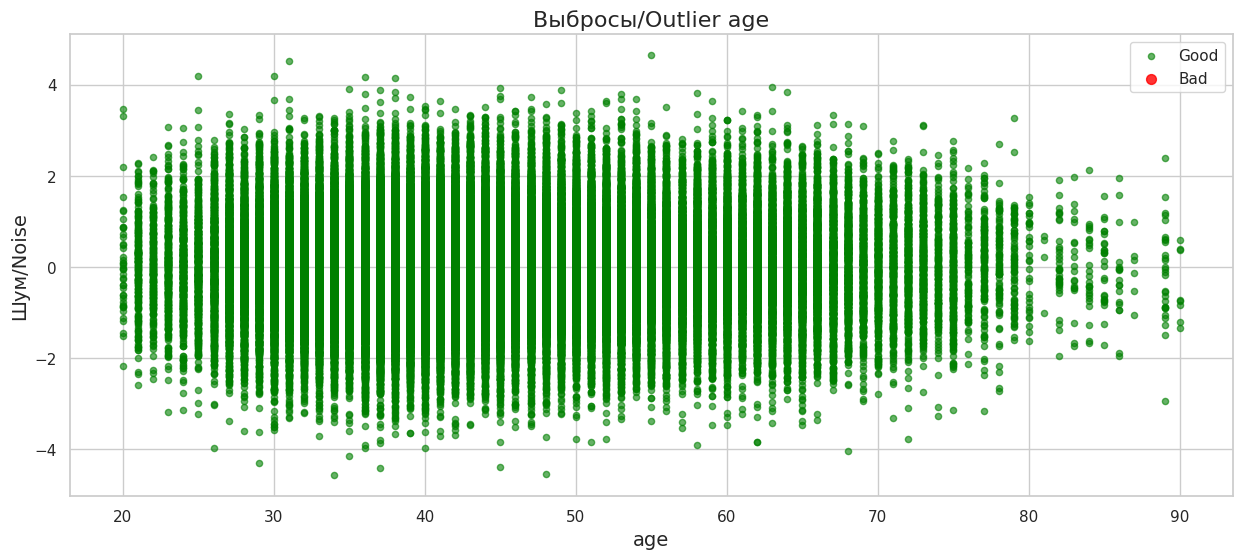

Rejection 588 points


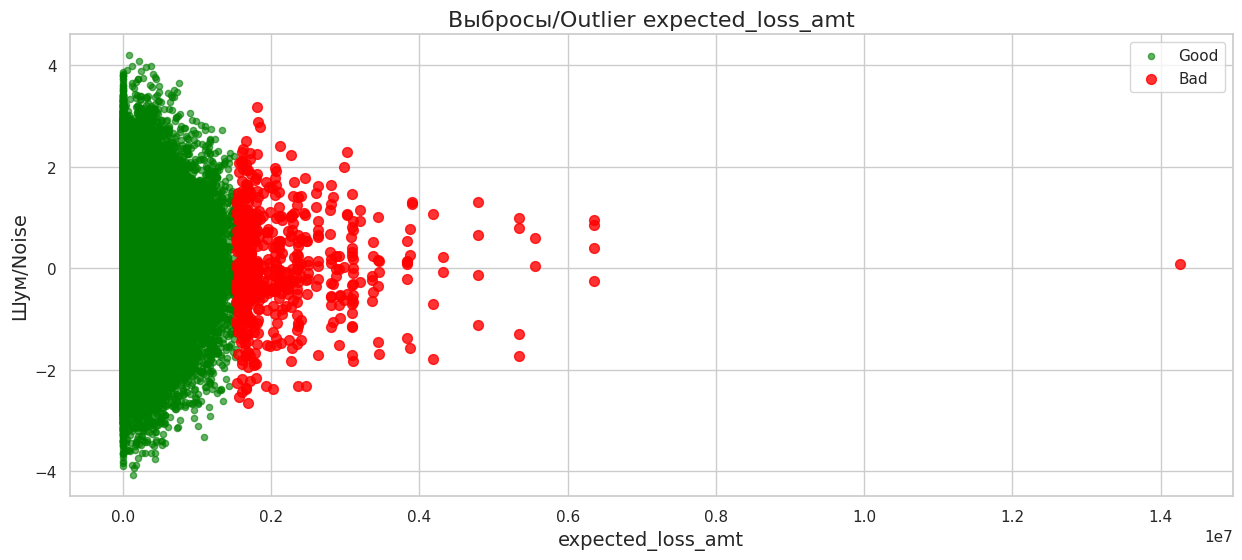

Rejection 263 points


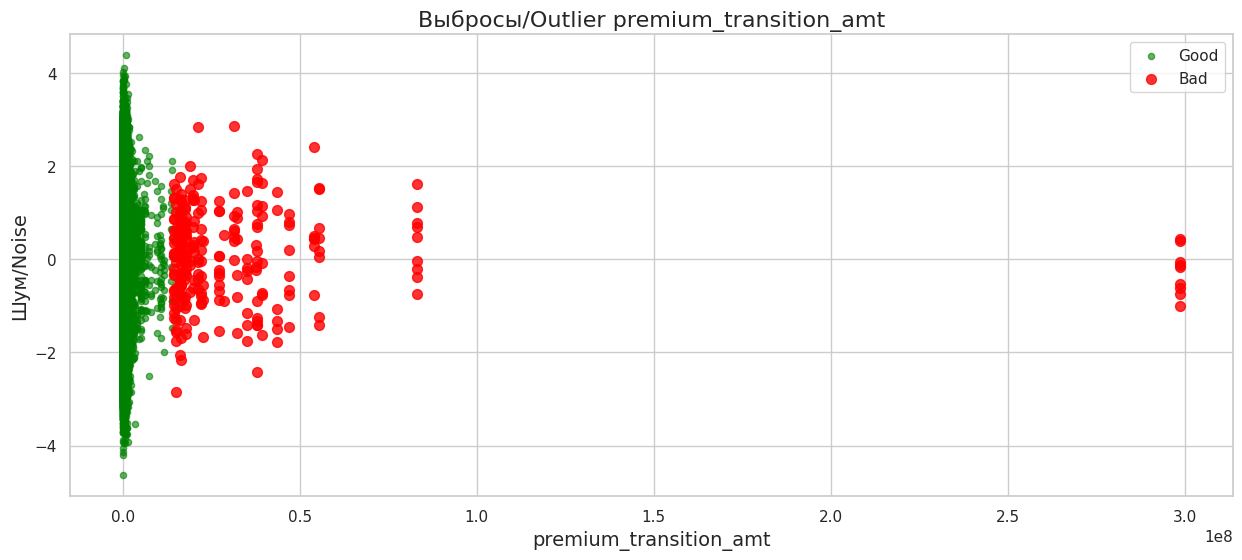

Rejection 0 points


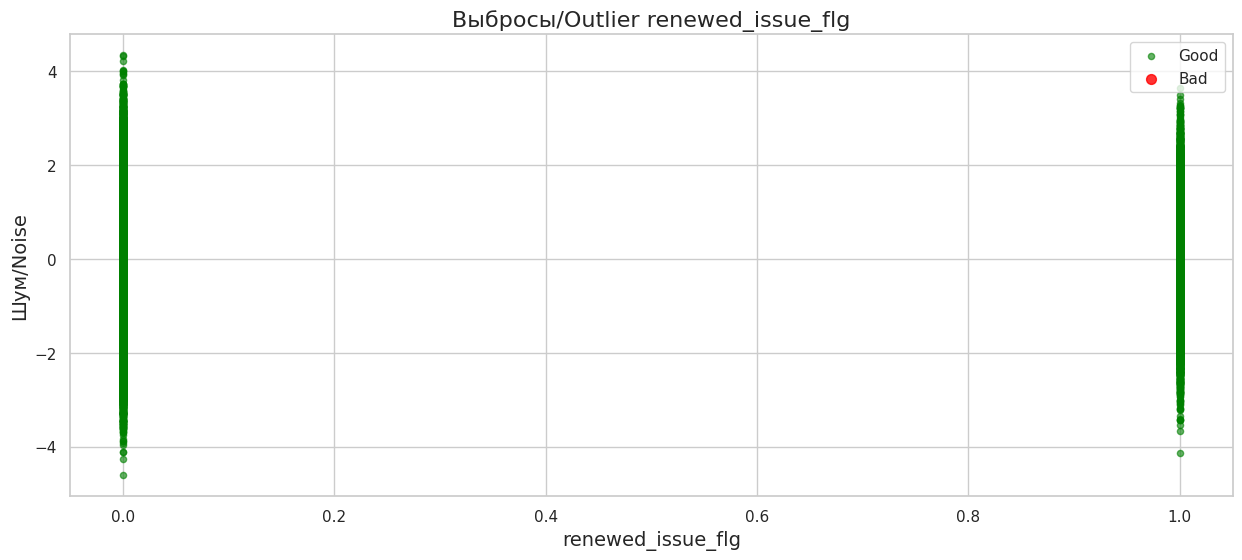

Rejection 403 points


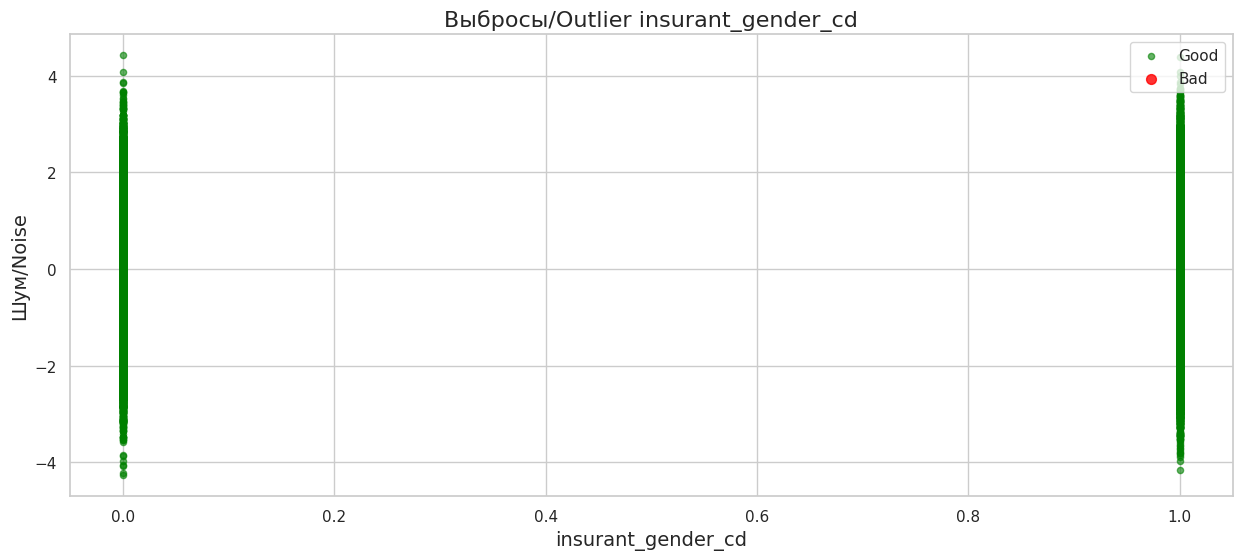

Rejection 0 points


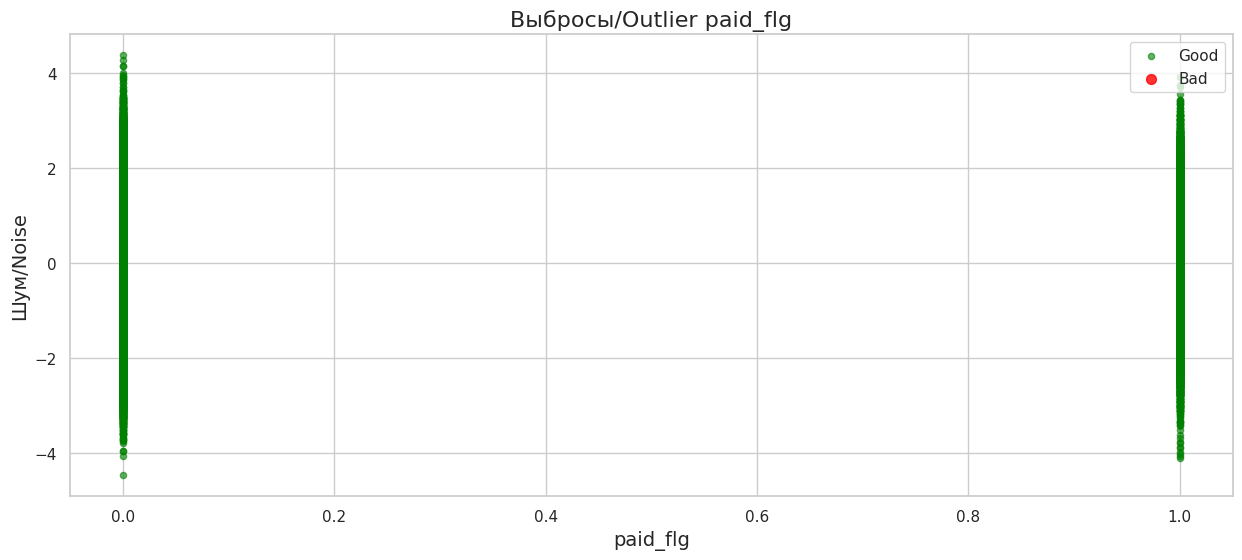

Rejection 504 points


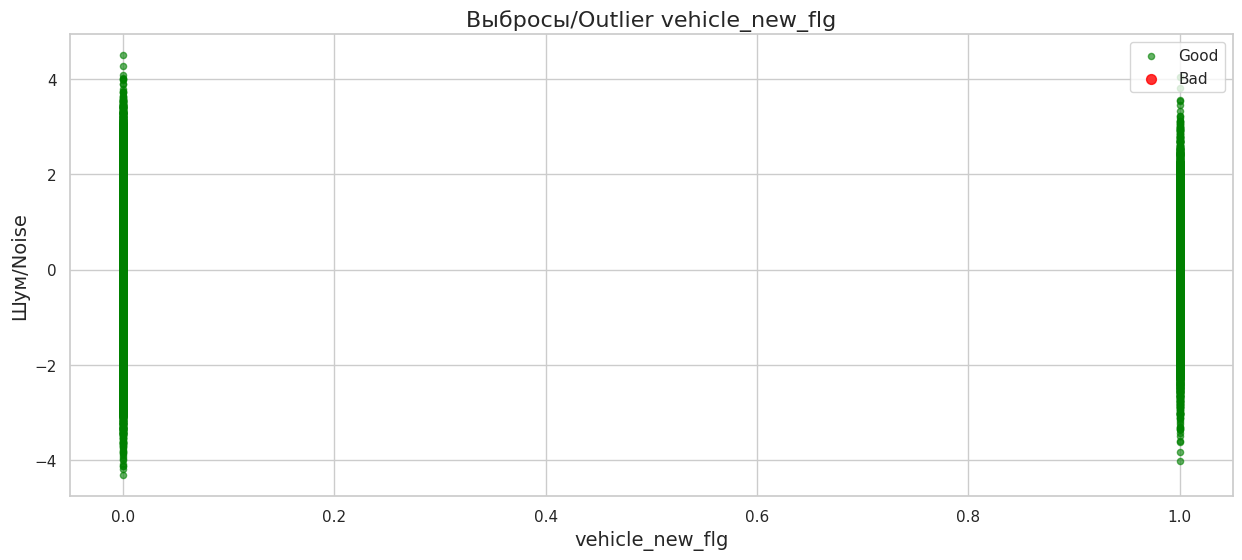

Rejection 0 points


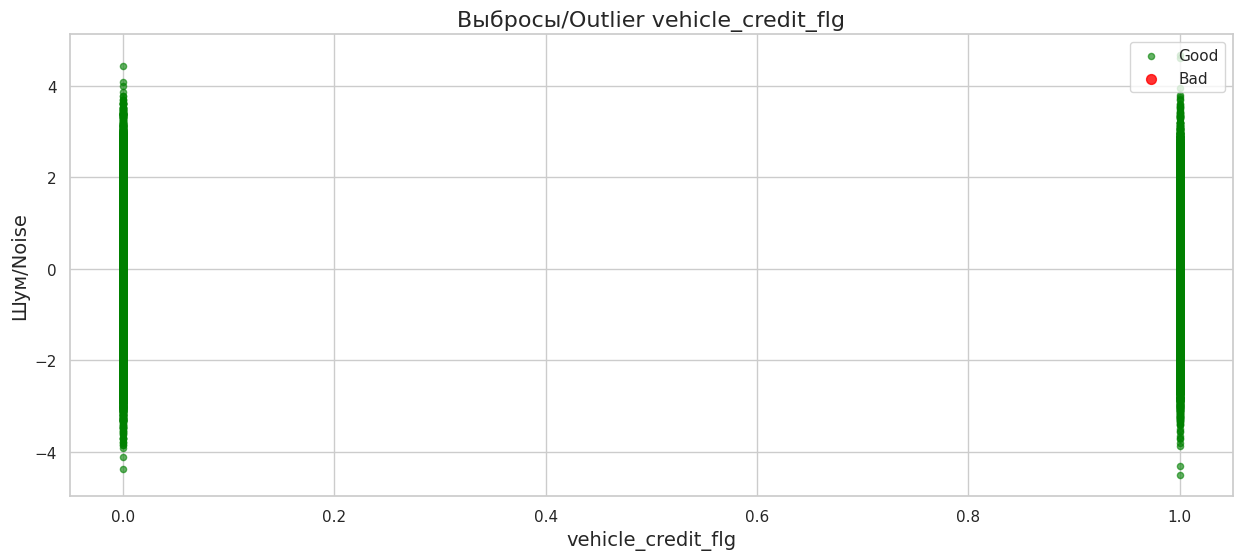

Rejection 148475 points


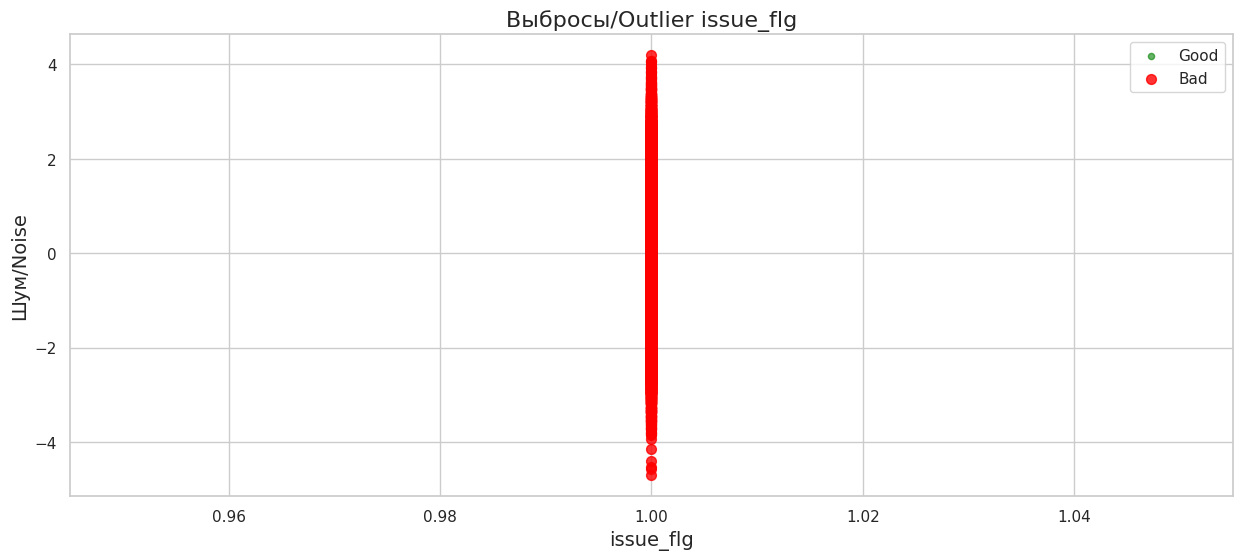

Rejection 376 points


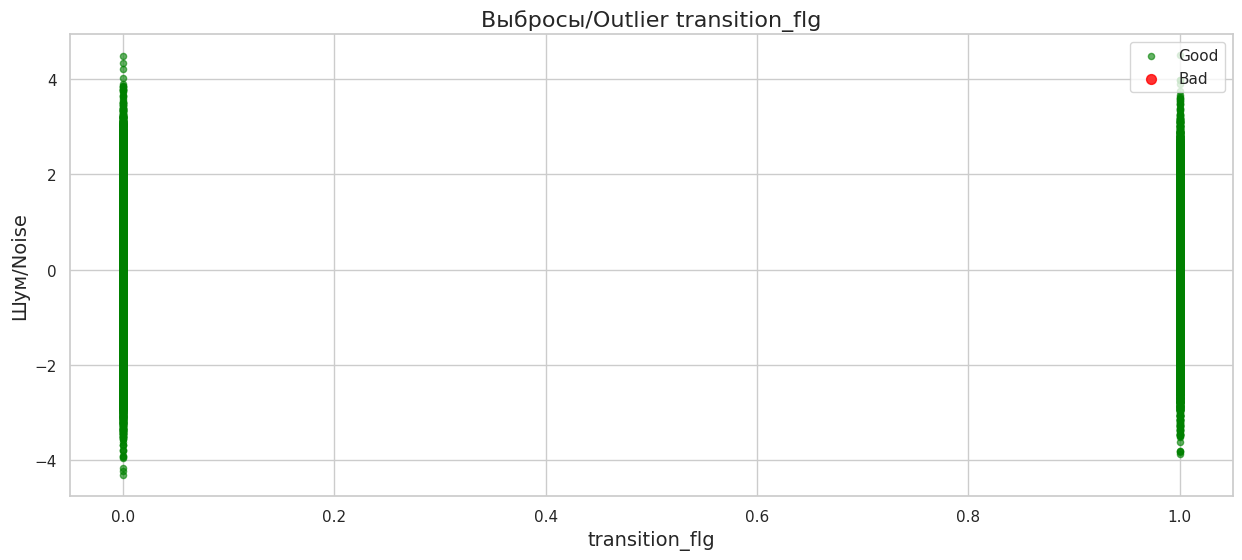

In [13]:
def plot_outliers(data2, feature, threshold=5):
    mean, std = np.mean(data2), np.std(data2)
    z_score = np.abs((data2 - mean) / std)
    good = z_score < threshold

    print(f"Rejection {(~good).sum()} points")

    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 6))
    visual_scatter = np.random.normal(size=data2.size)

    plt.scatter(data2[good], visual_scatter[good], s=20, label="Good", color="green", alpha=0.6)
    plt.scatter(data2[~good], visual_scatter[~good], s=50, label="Bad", color="red", alpha=0.8)

    plt.title(f'Выбросы/Outlier {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Шум/Noise', fontsize=14)

    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


for feature in main_features:
    plot_outliers(df[feature], feature)

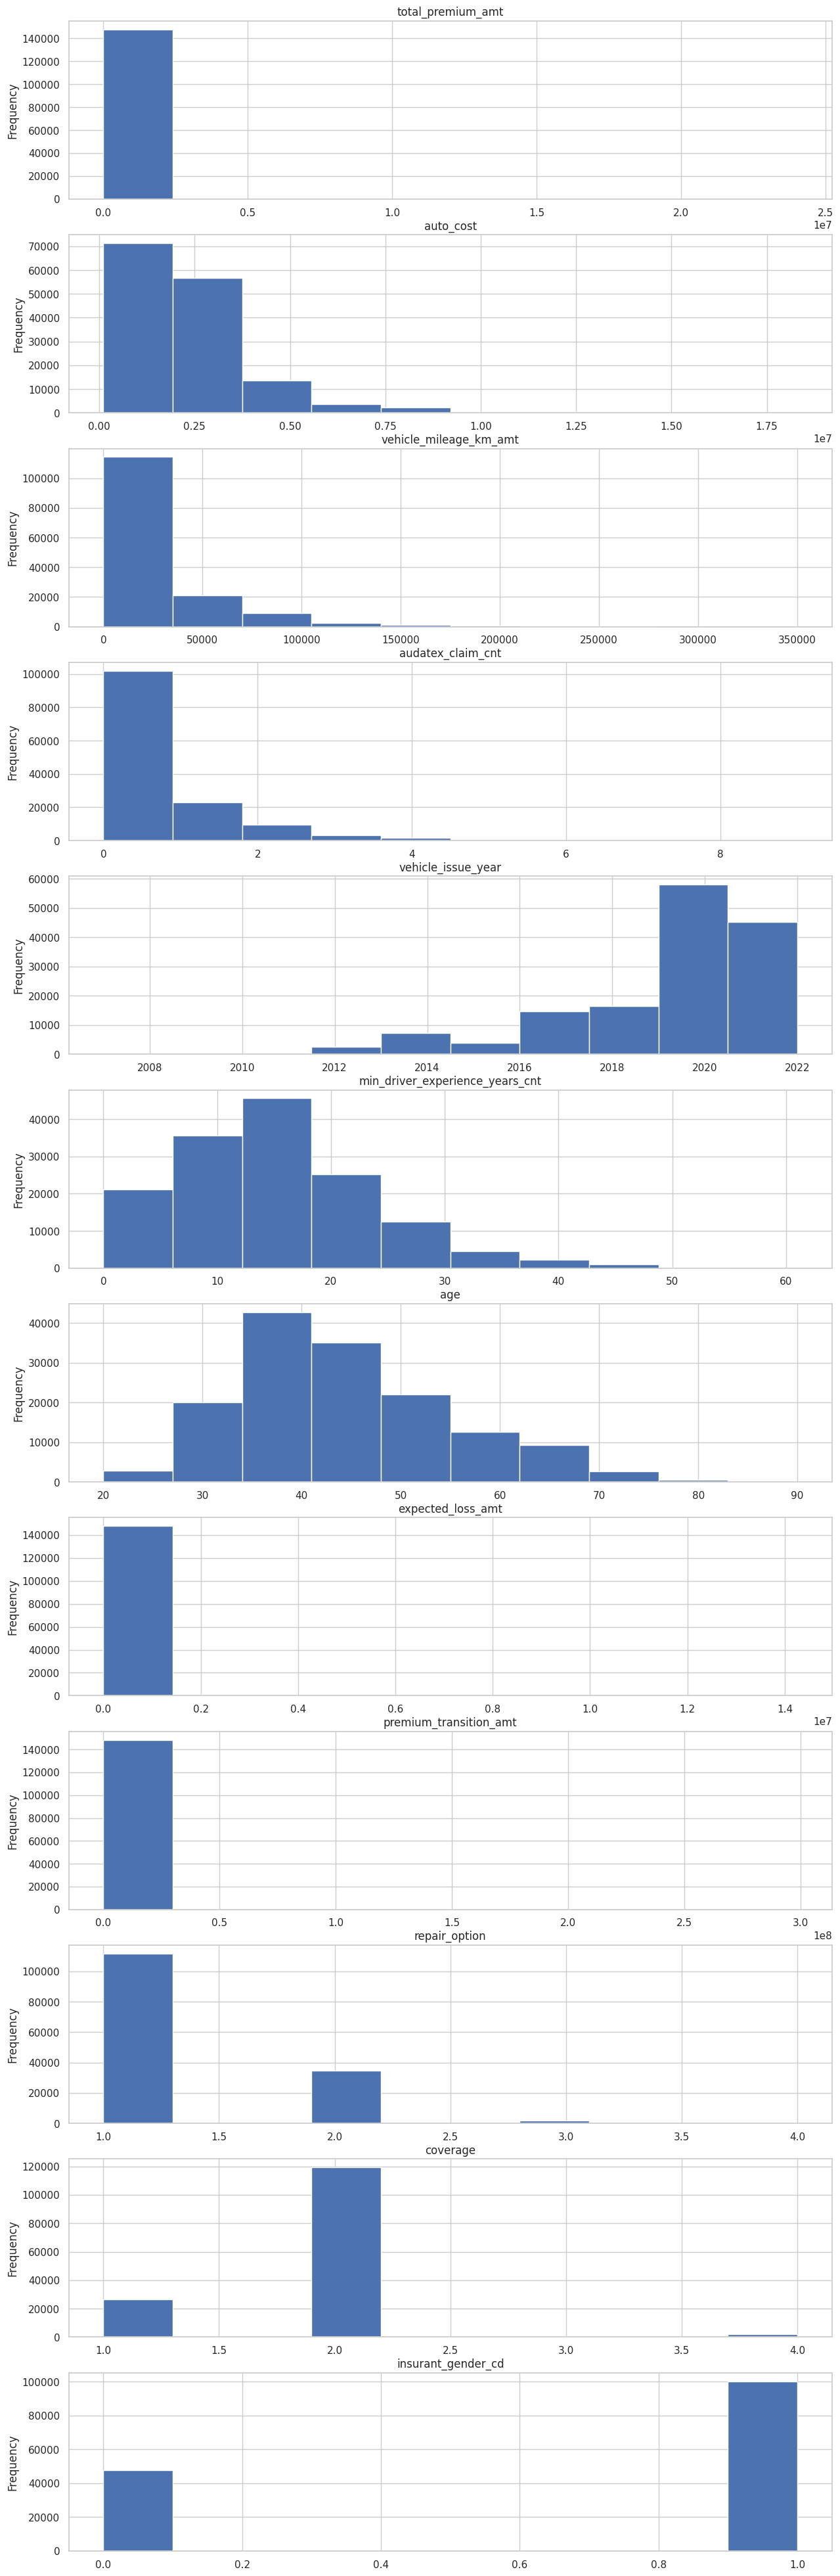

In [14]:
fig, axs = plt.subplots(12, 1, figsize=(15, 50))


df['total_premium_amt'].plot(kind='hist', ax=axs[0],  title='total_premium_amt')
df['auto_cost'].plot(kind='hist', ax=axs[1], title='auto_cost')
df['vehicle_mileage_km_amt'].plot(kind='hist', ax=axs[2],  title='vehicle_mileage_km_amt')
df['audatex_claim_cnt'].plot(kind='hist', ax=axs[3], title='audatex_claim_cnt')
df['vehicle_issue_year'].plot(kind='hist', ax=axs[4],  title='vehicle_issue_year')
df['min_driver_experience_years_cnt'].plot(kind='hist', ax=axs[5], title='min_driver_experience_years_cnt')
df['age'].plot(kind='hist', ax=axs[6], title='age')
df['expected_loss_amt'].plot(kind='hist', ax=axs[7],  title='expected_loss_amt')
df['premium_transition_amt'].plot(kind='hist', ax=axs[8], title='premium_transition_amt')
df['repair_option'].plot(kind='hist', ax=axs[9], title='repair_option')
df['coverage'].plot(kind='hist', ax=axs[10],  title='coverage')
df['insurant_gender_cd'].plot(kind='hist', ax=axs[11], title='insurant_gender_cd')

plt.show()

In [15]:
# Корреляционный анализ

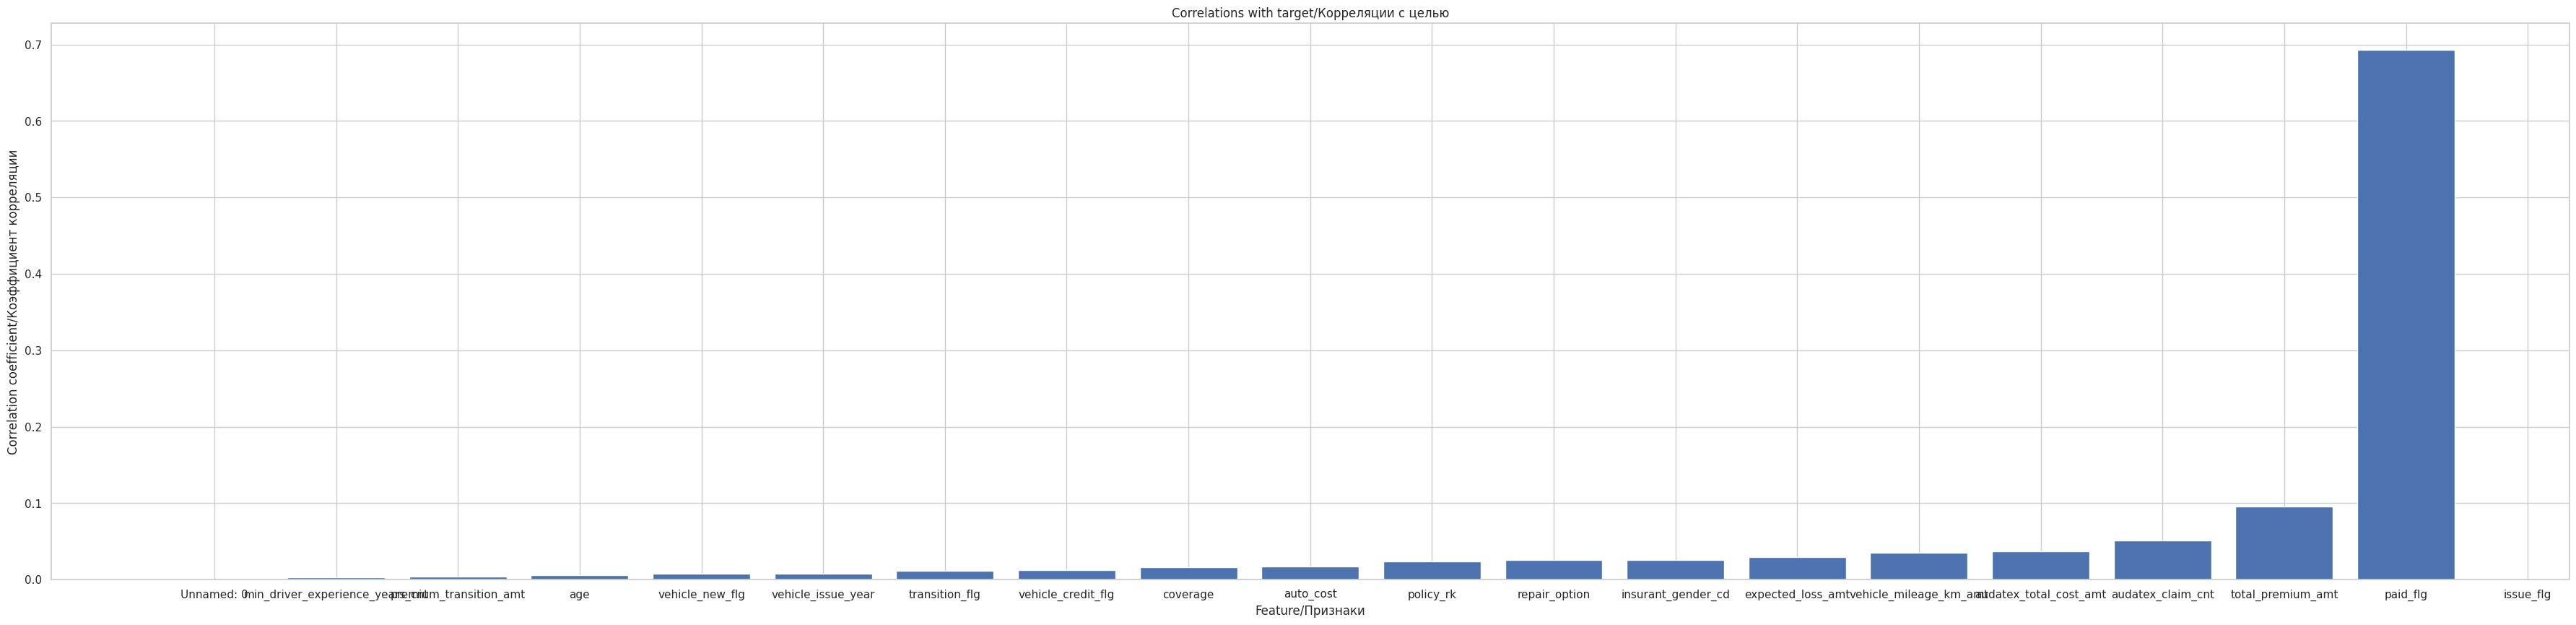

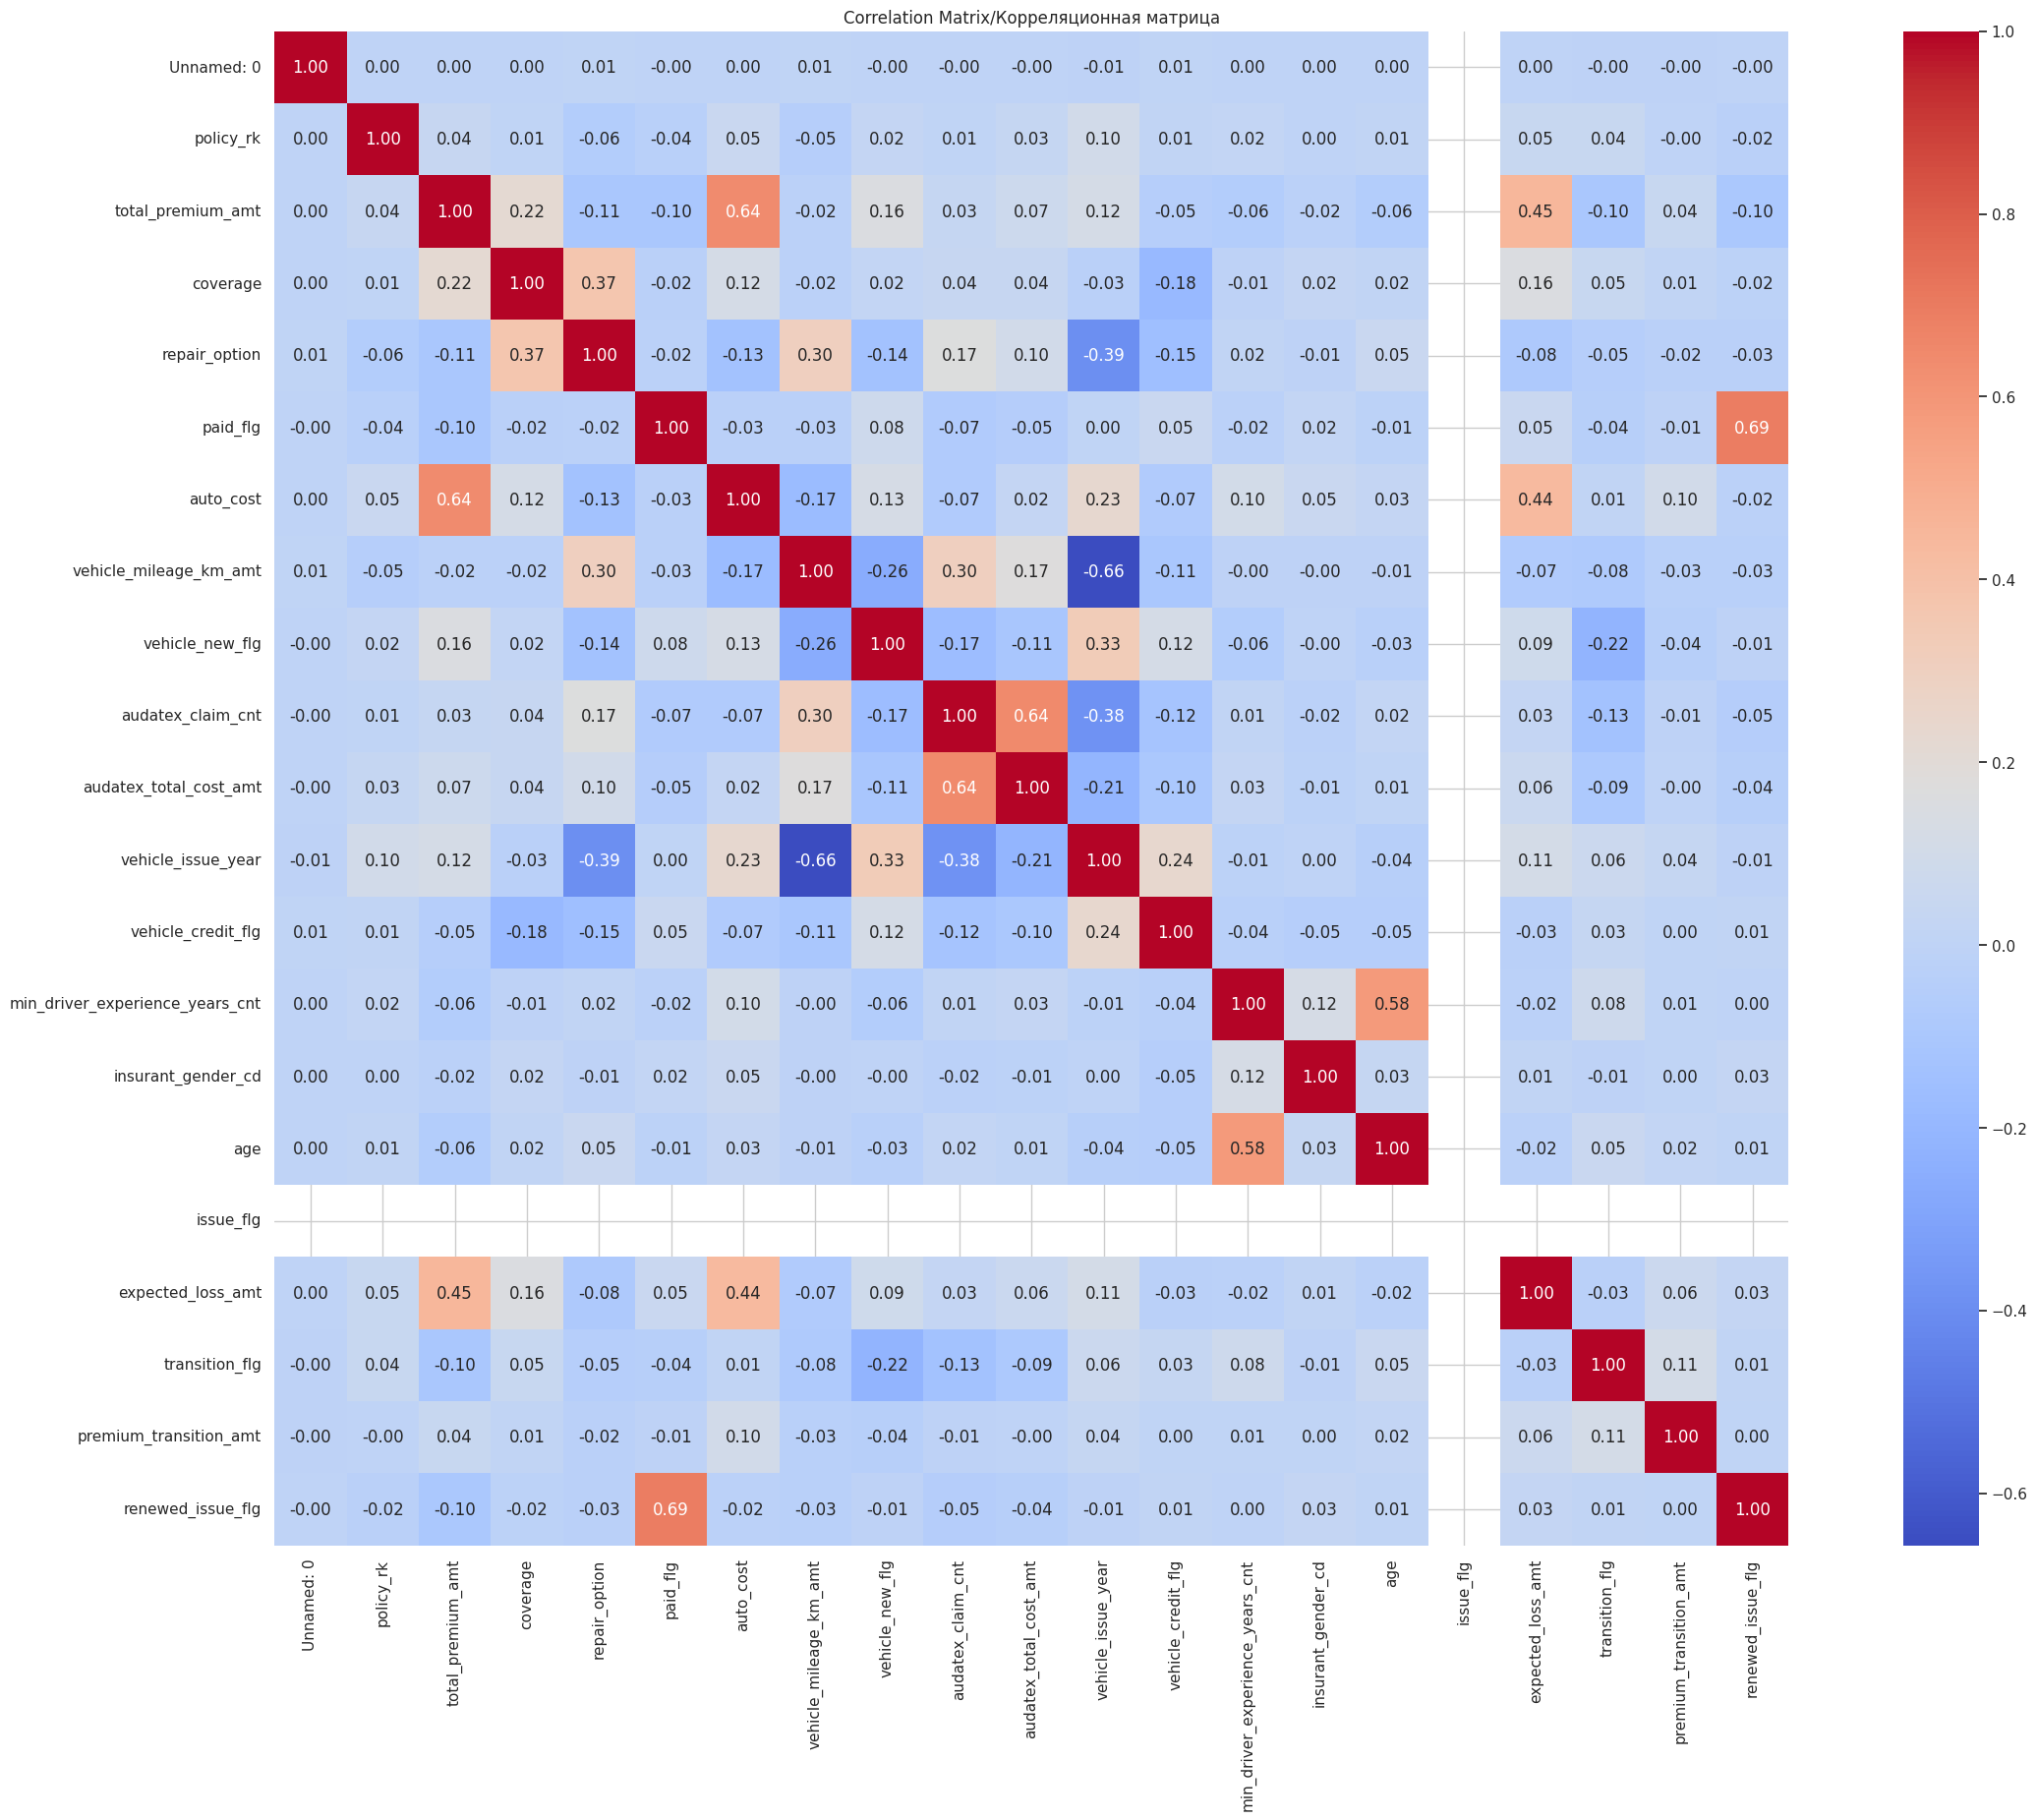

In [16]:
columns_to_drop = categorical_features

df_clean = df.drop(columns_to_drop, axis=1, inplace=True)

corr_with_target = df.corr()['renewed_issue_flg'].abs().sort_values()

corr_with_target = corr_with_target.drop('renewed_issue_flg')


#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(45, 10))
ax.bar(corr_with_target.index, corr_with_target.values)
ax.set_title('Correlations with target/Корреляции с целью')
ax.set_xlabel('Feature/Признаки')
ax.set_ylabel('Сorrelation coefficient/Коэффициент корреляции');

correlation_matrix = df.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix/Корреляционная матрица')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148475 entries, 0 to 148474
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       148475 non-null  int64  
 1   policy_rk                        148475 non-null  int64  
 2   total_premium_amt                148475 non-null  float64
 3   coverage                         148475 non-null  int64  
 4   repair_option                    148475 non-null  int64  
 5   paid_flg                         148475 non-null  int64  
 6   auto_cost                        148471 non-null  float64
 7   vehicle_mileage_km_amt           148433 non-null  float64
 8   vehicle_new_flg                  147971 non-null  float64
 9   audatex_claim_cnt                139833 non-null  float64
 10  audatex_total_cost_amt           148475 non-null  float64
 11  vehicle_issue_year               148475 non-null  int64  
 12  ve

Лучшие параметры:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39800
           1       0.98      0.98      0.98      4743

    accuracy                           1.00     44543
   macro avg       0.99      0.99      0.99     44543
weighted avg       1.00      1.00      1.00     44543



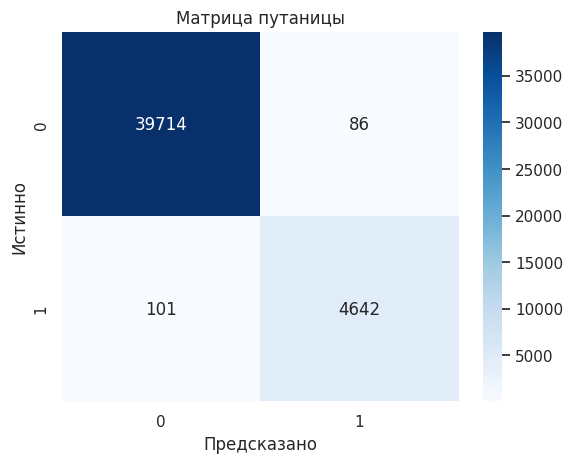

ROC AUC Score: 1.00


In [18]:
X = df.drop(['Unnamed: 0', 'policy_rk', 'issue_flg', 'renewed_issue_flg'], axis=1)
y = df['renewed_issue_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица путаницы')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')


Лучшие параметры:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39800
           1       0.86      0.74      0.79      4743

    accuracy                           0.96     44543
   macro avg       0.91      0.86      0.89     44543
weighted avg       0.96      0.96      0.96     44543



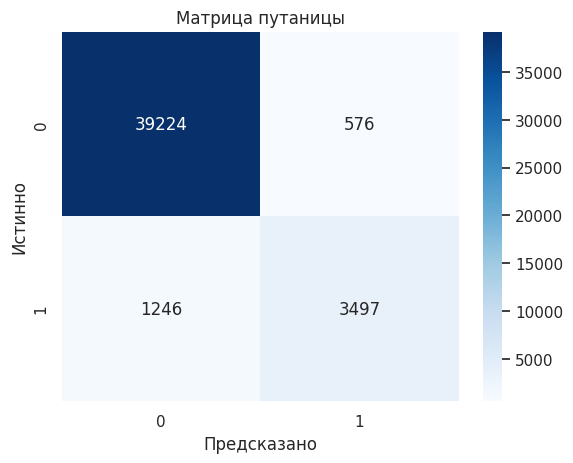

ROC AUC Score: 0.97


In [19]:
# paid_flg
X = df.drop(['Unnamed: 0', 'policy_rk', 'issue_flg', 'renewed_issue_flg', 'paid_flg'], axis=1)
y = df['renewed_issue_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица путаницы')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')


In [29]:
print(X.isnull().sum())


total_premium_amt                  0
coverage                           0
repair_option                      0
auto_cost                          0
vehicle_mileage_km_amt             0
vehicle_new_flg                    0
audatex_claim_cnt                  0
audatex_total_cost_amt             0
vehicle_issue_year                 0
vehicle_credit_flg                 0
min_driver_experience_years_cnt    0
insurant_gender_cd                 0
age                                0
expected_loss_amt                  0
transition_flg                     0
premium_transition_amt             0
dtype: int64


In [30]:
X = X.dropna()
y = y[X.index]

print(X.isnull().sum())


total_premium_amt                  0
coverage                           0
repair_option                      0
auto_cost                          0
vehicle_mileage_km_amt             0
vehicle_new_flg                    0
audatex_claim_cnt                  0
audatex_total_cost_amt             0
vehicle_issue_year                 0
vehicle_credit_flg                 0
min_driver_experience_years_cnt    0
insurant_gender_cd                 0
age                                0
expected_loss_amt                  0
transition_flg                     0
premium_transition_amt             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Лучшие параметры:  {'C': 0.01, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     37427
           1       0.19      0.00      0.00      4399

    accuracy                           0.89     41826
   macro avg       0.54      0.50      0.47     41826
weighted avg       0.82      0.89      0.85     41826



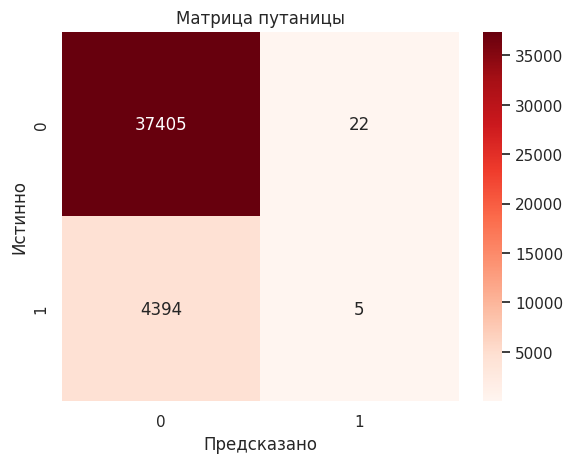

ROC AUC Score: 0.66


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Матрица путаницы')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')


Лучшие параметры:  {'C': 0.01, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     37427
           1       0.19      0.00      0.00      4399

    accuracy                           0.89     41826
   macro avg       0.54      0.50      0.47     41826
weighted avg       0.82      0.89      0.85     41826



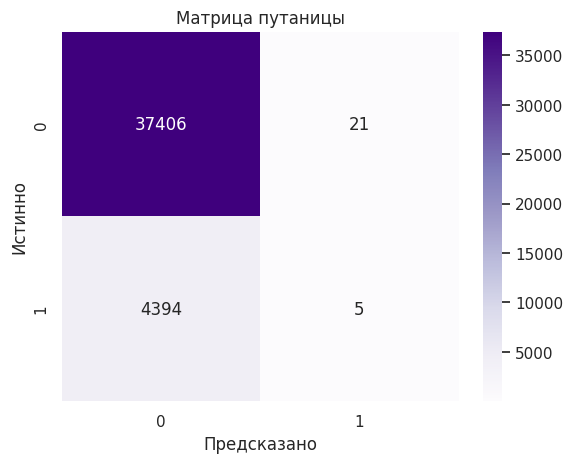

ROC AUC Score: 0.67


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=2000, random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)


y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Матрица путаницы')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')